# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import *
import string
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VS
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn

#new 
from nltk.tokenize.casual import casual_tokenize #casual_tokenize(text, preserve_case=True, reduce_len=False, strip_handles=False)
from nltk.tokenize import TreebankWordTokenizer

# Own functions
from FeatureFunctions import *

%matplotlib inline

In [2]:
def get_weights(classes, exponent = 1):
    # original balanced weights
    class_weights_balanced = dict(zip([0,1,2],[len(classes)/(3*sum(classes==i)) for i in range(3)]))

    # Expoentially weighted
    Z = sum(val**exponent for key,val in class_weights_balanced.items())
    class_weights_dict= dict(zip([0,1,2],[(val**exponent)/Z for key,val in class_weights_balanced.items()]))

    # To tensor
    #class_weights = torch.tensor([ value for value in class_weights_dict.values()]) 
    print(f'Weights to be used: {class_weights_dict.items()}')
    return class_weights_dict

# Notebook Setup

This notebook is used to analyse the influence of more aggresive weighting of the hate speech class
 
The overall setup is the casual_std setup from 'ComparingTokenizations.ipynb'.

The weigting procedure is described in the underlying report.

In [3]:
#Save data to folder
PREFIX = 'data/AggresiveWeighting/'
TOKENIZER = 'casual_std'
MIN_DF = 5
MAX_DF = 0.75
MAX_NGRAM = 3
USE_STOPWORDS = True
USE_PREPROCESS = False

In [4]:
# Get data (indep of weighting)
data = TweetsDataset(csv_path =  "../data/labeled_data.csv", tokenizer_name = TOKENIZER, use_stopwords = USE_STOPWORDS, use_preprocessor= USE_PREPROCESS, min_df = MIN_DF, max_df = MAX_DF, max_ngram = MAX_NGRAM)
X = data.features
y = data.labels

A vocab was created. It consists of 10000 entries

 Data has been processed and is now available. Feature dim: (24783, 15017)


# Exponent 1 (Standard Balanced Weighting)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [6]:
EXPONENT = 1
WEIGHTS = 'balanced'

## Build model


In [7]:
select = SelectFromModel(LogisticRegression(class_weight= 'balanced',penalty="l1",C=0.01, solver ='liblinear', max_iter = 100))
X_train = select.fit_transform(X_train,y_train)
X_test = select.transform(X_test)
print(f'Deature dimension after dimensionality reduction: {X_train.shape}')

Deature dimension after dimensionality reduction: (22304, 264)


In [8]:
model = LogisticRegression(class_weight=WEIGHTS,penalty='l2',C=0.01, solver = 'liblinear').fit(X_train,y_train)
y_preds = model.predict(X_test)

## Evaluating the results

In [9]:
report = classification_report(y_test, y_preds , output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv(f'{PREFIX}_Expo{EXPONENT}_report.csv')

In [10]:
report_df

,precision,recall,f1-score,support
0,0.443925,0.579268,0.502646,164.000000
1,0.959819,0.890289,0.923747,1905.000000
2,0.773092,0.939024,0.848018,410.000000
accuracy,0.877773,0.877773,0.877773,0.877773
macro avg,0.725612,0.802860,0.758137,2479.000000
weighted avg,0.894807,0.877773,0.883364,2479.000000


Confusionmatrix was saved to data/AggresiveWeighting/_Expo1_confusion.png


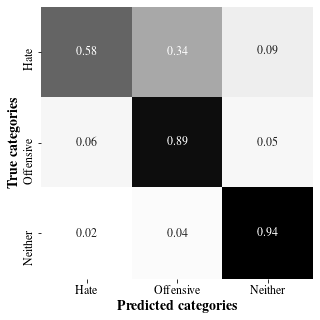

In [11]:
print_cm(y_test,y_preds, save_cm = True, save_path = (f'{PREFIX}_Expo{EXPONENT}_confusion.png'))

# Exponent 1.25 

In [12]:
# get data again untransformed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [13]:
EXPONENT = 1.25
WEIGHTS = get_weights(classes = y_train, exponent = EXPONENT )

Weights to be used: dict_items([(0, 0.7720916387084936), (1, 0.029418752434066015), (2, 0.19848960885744033)])


## Build model


In [14]:
select = SelectFromModel(LogisticRegression(class_weight='balanced',penalty="l1",C=0.01, solver ='liblinear', max_iter = 100))
X_train = select.fit_transform(X_train,y_train)
X_test = select.transform(X_test)
print(f'Deature dimension after dimensionality reduction: {X_train.shape}')

Deature dimension after dimensionality reduction: (22304, 264)


In [15]:
model = LogisticRegression(class_weight=WEIGHTS,penalty='l2',C=0.01, solver = 'liblinear').fit(X_train,y_train)
y_preds = model.predict(X_test)

## Evaluating the results

In [16]:
report = classification_report( y_test, y_preds , output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv(f'{PREFIX}_Expo{EXPONENT}_report.csv')

In [17]:
report_df

,precision,recall,f1-score,support
0,0.411765,0.597561,0.487562,164.000000
1,0.956995,0.876115,0.914771,1905.000000
2,0.756539,0.917073,0.829107,410.000000
accuracy,0.864461,0.864461,0.864461,0.864461
macro avg,0.708433,0.796917,0.743813,2479.000000
weighted avg,0.887772,0.864461,0.872341,2479.000000


Confusionmatrix was saved to data/AggresiveWeighting/_Expo1.25_confusion.png


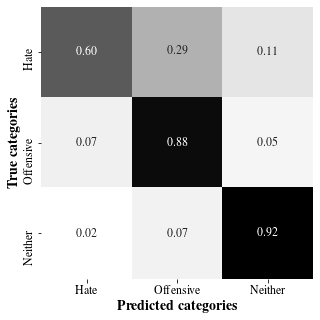

In [18]:
print_cm(y_test,y_preds, save_cm = True, save_path = (f'{PREFIX}_Expo{EXPONENT}_confusion.png'))

# Exponent 1.5 

In [19]:
# get data again untransformed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [20]:
EXPONENT = 1.5
WEIGHTS = get_weights(classes = y_train, exponent = EXPONENT )

Weights to be used: dict_items([(0, 0.8225417688963228), (1, 0.016304385810111538), (2, 0.16115384529356555)])


## Build model


In [21]:
select = SelectFromModel(LogisticRegression(class_weight='balanced',penalty="l1",C=0.01, solver ='liblinear', max_iter = 100))
X_train = select.fit_transform(X_train,y_train)
X_test = select.transform(X_test)
print(f'Deature dimension after dimensionality reduction: {X_train.shape}')

Deature dimension after dimensionality reduction: (22304, 264)


In [22]:
model = LogisticRegression(class_weight=WEIGHTS,penalty='l2',C=0.01, solver = 'liblinear').fit(X_train,y_train)
y_preds = model.predict(X_test)

## Evaluating the results

In [23]:
report = classification_report( y_test, y_preds , output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv(f'{PREFIX}_Expo{EXPONENT}_report.csv')

In [24]:
report_df

,precision,recall,f1-score,support
0,0.380435,0.640244,0.477273,164.000000
1,0.962331,0.858268,0.907325,1905.000000
2,0.748016,0.919512,0.824945,410.000000
accuracy,0.853973,0.853973,0.853973,0.853973
macro avg,0.696927,0.806008,0.736514,2479.000000
weighted avg,0.888390,0.853973,0.865250,2479.000000


Confusionmatrix was saved to data/AggresiveWeighting/_Expo1.5_confusion.png


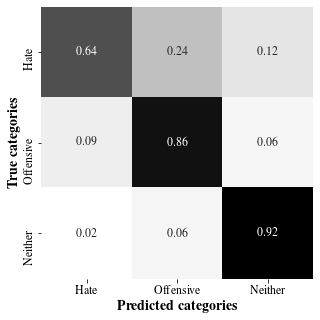

In [25]:
print_cm(y_test,y_preds, save_cm = True, save_path = (f'{PREFIX}_Expo{EXPONENT}_confusion.png'))